In [41]:
# --- Imports
import numpy as np
from random import random, seed
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Model imports
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler


# --- Settings
sns.set_theme(style='whitegrid')

In [64]:
MSE_test, MSE_train = np.zeros((50, 14)), np.zeros((50, 14))

np.random.seed(3)

for i in range(50):
    n = 50
    # Make data set.
    x = np.linspace(-3, 3, n).reshape(-1, 1)
    y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)
    
    # Splitting the data into train and test
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=3)

    mse_train = np.zeros(14)
    mse_test = np.zeros(14)
    degrees = list(range(1,15))
    for deg in degrees:
        # Fitting the data
        model = make_pipeline(
            PolynomialFeatures(degree=deg),
            LinearRegression()
            )

        model.fit(X_train, Y_train)

        y_predict_train = model.predict(X_train)
        y_predict_test = model.predict(X_test)

        # calculating the MSE for the train and test dataset
        mse_train[deg-1] = mean_squared_error(Y_train, y_predict_train)
        mse_test[deg-1] = mean_squared_error(Y_test, y_predict_test)

    MSE_train[i] = mse_train
    MSE_test[i] = mse_test

    MSE_train_mean = np.mean(MSE_train, axis=0)
    MSE_test_mean = np.mean(MSE_test, axis=0)


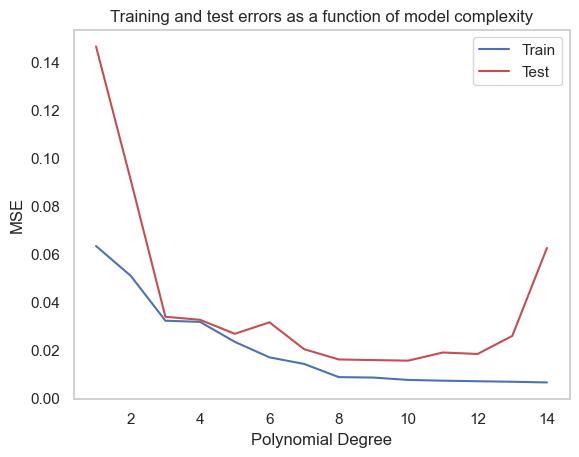

In [65]:
plt.plot(degrees, MSE_train_mean, label='Train', color='b')
plt.plot(degrees, MSE_test_mean, label='Test', color='r')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.title('Training and test errors as a function of model complexity')
plt.legend()
plt.grid(False)
plt.show()

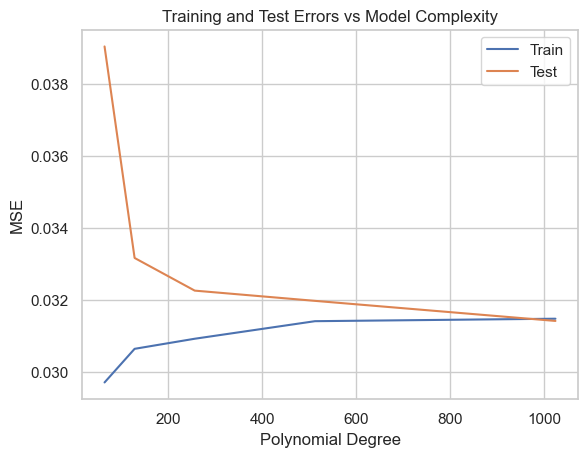

In [67]:
MSE_test, MSE_train = np.zeros((50, 5)), np.zeros((50, 5))

np.random.seed(3)

num_list = np.logspace(6, 10, 5, base=2).astype(int)

for i in range(50):
    mse_train = np.zeros(5)
    mse_test = np.zeros(5)

    # Fitting the data
    model = make_pipeline(
            PolynomialFeatures(degree=3),
            LinearRegression()
            )

    for idx, n in enumerate(num_list):
        # Make data set.
        x = np.linspace(-3, 3, n).reshape(-1, 1)
        y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)
        
        # Splitting the data into train and test
        X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

        model.fit(X_train, Y_train)

        y_predict_train = model.predict(X_train)
        y_predict_test = model.predict(X_test)

        # calculating the MSE for the train and test dataset
        mse_train[idx] = mean_squared_error(Y_train, y_predict_train)
        mse_test[idx] = mean_squared_error(Y_test, y_predict_test)

    MSE_train[i] = mse_train
    MSE_test[i] = mse_test

    MSE_train_mean = np.mean(MSE_train, axis=0)
    MSE_test_mean = np.mean(MSE_test, axis=0)

plt.plot(num_list, MSE_train_mean, label='Train')
plt.plot(num_list, MSE_test_mean, label='Test')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.title('Training and Test Errors vs Model Complexity')
plt.legend()
plt.show()


### Franke Function

In [69]:
def FrankeFunction(x,y): # From excercise description
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

### Degree of polynomial

In [68]:
# Making data
n = 100
x = np.linspace(0, 1, n)
y = np.linspace(0, 1, n)
x, y = np.meshgrid(x,y)
# Unraveling to n^2-arrays
x = x.ravel()
y = y.ravel()

k = 0.1 # noise coefficient
z = FrankeFunction(x,y) + k*np.random.randn(n**2) # target variable with standard normal noise

In [70]:
np.random.seed(3)

max_degree = 15

X = np.column_stack((x,y))
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=3)

# Splitting the data into train and test
MSE_train = np.zeros(max_degree)
MSE_test = np.zeros(max_degree)
degrees = list(range(1,max_degree+1))
for idx, deg in enumerate(degrees):
    # Fitting the data
    model = make_pipeline(
        PolynomialFeatures(degree=deg),
        LinearRegression()
        )

    model.fit(X_train, z_train)

    y_predict_train = model.predict(X_train)
    y_predict_test = model.predict(X_test)

    # Calculating the MSE for the train and test dataset
    MSE_train[idx] = mean_squared_error(z_train, y_predict_train)
    MSE_test[idx] = mean_squared_error(z_test, y_predict_test)


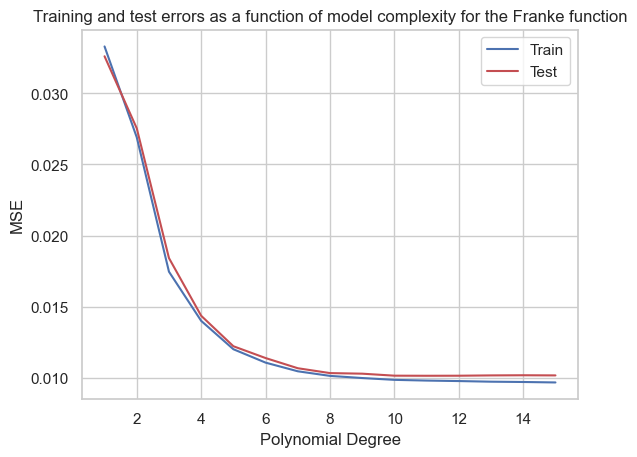

In [72]:
plt.plot(degrees, MSE_train, label='Train', color='b')
plt.plot(degrees, MSE_test, label='Test', color='r')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.title('Training and test errors as a function of model complexity for the Franke function')
plt.legend()
plt.show()

### Number of datapoints

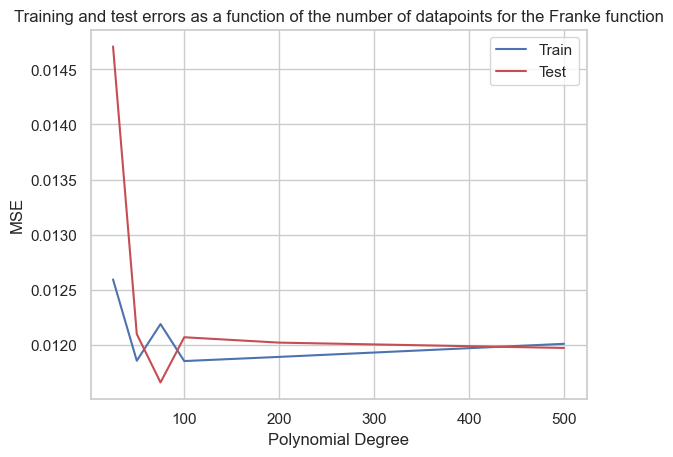

In [75]:
np.random.seed(3)

max_degree = 5

# Splitting the data into train and test
num_list = np.asarray([25, 50, 75, 100, 200, 500])
MSE_train = np.zeros(len(num_list))
MSE_test = np.zeros(len(num_list))
for idx, n in enumerate(num_list):
    # Making data
    x = np.linspace(0, 1, n)
    y = np.linspace(0, 1, n)
    x, y = np.meshgrid(x,y)

    x = x.ravel()
    y = y.ravel()

    k = .1 # noise coefficient
    z = FrankeFunction(x,y) + k*np.random.randn(n**2) # target variable with standard normal noise

    # stacking x and y beside each other and splitting the data
    X = np.column_stack((x,y))
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=3)

    # Fitting the data
    model = make_pipeline(
        PolynomialFeatures(degree=max_degree),
        LinearRegression()
        )

    model.fit(X_train, z_train)

    y_predict_train = model.predict(X_train)
    y_predict_test = model.predict(X_test)

    # calculating the MSE for the train and test dataset
    MSE_train[idx] = mean_squared_error(z_train, y_predict_train)
    MSE_test[idx] = mean_squared_error(z_test, y_predict_test)

plt.plot(num_list, MSE_train, label='Train', color='b')
plt.plot(num_list, MSE_test, label='Test', color='r')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.title('Training and test errors as a function of the number of datapoints for the Franke function')
plt.legend()
plt.show()


### Bootstrap

In [76]:
def bootstrap(n, X_train, X_test, z_train, z_test, pipeline): # as in lecture notes
    z_pred = np.empty((z_test.shape[0], n))
    for i in range(n):
        x_, y_ = resample(X_train, z_train) # bootstrap from sklearn.utils

        # Evaluate the new model on the same test data each time
        z_pred[:, i] = pipeline.fit(x_, y_).predict(X_test).ravel()

    return z_pred

In [60]:
n_bootstrap = 50

# --- Creating design matrix
p = 15 # highest polynomial degree
degrees = np.arange(p+1) # for looping

# --- Loop
MSE_train_OLS, MSE_test_OLS = np.zeros(p), np.zeros(p)

error_OLS = np.zeros(p)
bias_OLS = np.zeros(p)
variance_OLS = np.zeros(p)

for deg in degrees[1:]: 
    # Splitting the data 
    X = np.column_stack((x,y)) # design matrix
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=3)
    
    pipeline = make_pipeline(
            PolynomialFeatures(degree=deg),
            StandardScaler(),
            LinearRegression())
    
    # --- Fitting our model to our train-dataset and predicting values from both test and train
    pipeline.fit(X_train, z_train)
    z_tilde = pipeline.predict(X_train)
    z_predict = pipeline.predict(X_test)
    
    # Standard metrics
    MSE_train_OLS[deg-1] = mean_squared_error(z_train, z_tilde)
    MSE_test_OLS[deg-1] = mean_squared_error(z_test, z_predict)

    # --- Estimating the variance of the best model with bootstrap
    z_bootstrap = bootstrap(n_bootstrap, X_train, X_test, z_train, z_test, pipeline)
    z_test = z_test.reshape(-1,1) # casting to 2D column
    
    error_OLS[deg-1] = np.mean( np.mean((z_test - z_bootstrap)**2, axis=1, keepdims=True) )
    bias_OLS[deg-1] = np.mean((z_test - np.mean(z_bootstrap, axis=1, keepdims=True))**2)
    variance_OLS[deg-1] = np.mean(np.var(z_bootstrap, axis=1, keepdims=True) )
    print(rf"The error, squared bias and variance of OLS (degree {deg}) is {error_OLS[deg-1]:.4f} >= {bias_OLS[deg-1]:.4f} + {variance_OLS[deg-1]:.8f}, in order. Beware of rounding errors!")
    print('-'*50) # separator


The error, squared bias and variance of OLS (degree 1) is 0.0333 >= 0.0333 + 0.00000040, in order. Beware of rounding errors!
--------------------------------------------------
The error, squared bias and variance of OLS (degree 2) is 0.0269 >= 0.0269 + 0.00000091, in order. Beware of rounding errors!
--------------------------------------------------
The error, squared bias and variance of OLS (degree 3) is 0.0177 >= 0.0177 + 0.00000092, in order. Beware of rounding errors!
--------------------------------------------------
The error, squared bias and variance of OLS (degree 4) is 0.0139 >= 0.0139 + 0.00000106, in order. Beware of rounding errors!
--------------------------------------------------
The error, squared bias and variance of OLS (degree 5) is 0.0120 >= 0.0120 + 0.00000129, in order. Beware of rounding errors!
--------------------------------------------------
The error, squared bias and variance of OLS (degree 6) is 0.0110 >= 0.0110 + 0.00000149, in order. Beware of roundi

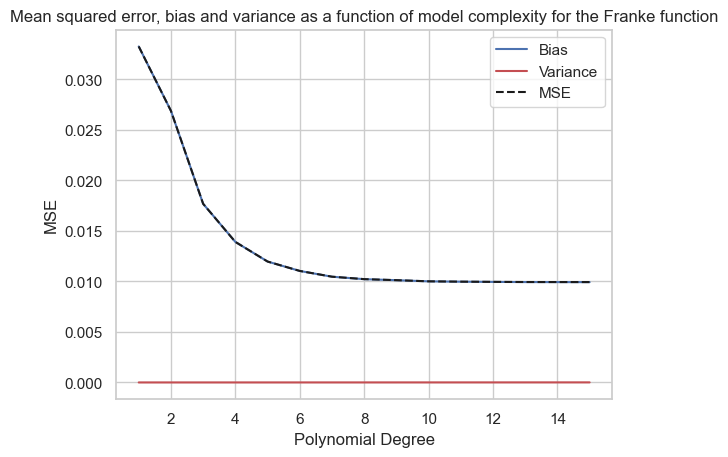

In [86]:
plt.plot(degrees, bias_OLS, label='Bias', color='b')
plt.plot(degrees, variance_OLS, label='Variance', color='r')
plt.plot(degrees, error_OLS, linestyle='dashed', label='MSE', color='k')
plt.title('Mean squared error, bias and variance as a function of model complexity for the Franke function')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.legend()
plt.show()